VISUALIZATION 2 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pbp = pd.read_csv('ista131_fp_nba2019-20_pbp.csv')

In [4]:
pbp.head()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,...,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Group by each quarter, creating a row for each quarter
quarters = pbp.groupby(['Location', 'GameType', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'Quarter'], as_index = False)

quarter_end_points = quarters.agg({'HomeScore': ['max'], 'AwayScore': ['max'], 'SecLeft': ['min']})

quarter_end_points

,Location,GameType,Date,Time,HomeTeam,AwayTeam,Quarter,HomeScore,AwayScore,SecLeft
,,,,,,,,max,max,min
0,AT&T Center San Antonio Texas,regular,December 12 2019,8:30 PM,SAS,CLE,1,19,28,0
1,AT&T Center San Antonio Texas,regular,December 12 2019,8:30 PM,SAS,CLE,2,43,53,0
2,AT&T Center San Antonio Texas,regular,December 12 2019,8:30 PM,SAS,CLE,3,68,78,0
3,AT&T Center San Antonio Texas,regular,December 12 2019,8:30 PM,SAS,CLE,4,103,103,0
4,AT&T Center San Antonio Texas,regular,December 12 2019,8:30 PM,SAS,CLE,5,109,117,0
...,...,...,...,...,...,...,...,...,...,...
4649,Wells Fargo Center Philadelphia Pennsylvania,regular,October 23 2019,7:30 PM,PHI,BOS,4,107,93,0
4650,Wells Fargo Center Philadelphia Pennsylvania,regular,October 30 2019,7:00 PM,PHI,MIN,1,32,24,0
4651,Wells Fargo Center Philadelphia Pennsylvania,regular,October 30 2019,7:00 PM,PHI,MIN,2,62,43,0


In [6]:
#Creating new df containing MN Timberwolves home games vs the LA Lakers
twolves_vs_clippers = pbp[(pbp['HomeTeam'] == 'MIN') & (pbp['AwayTeam'] == 'LAC')]

In [7]:
twolves_vs_clippers

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
179375,/boxscores/201912130MIN.html,regular,Target Center Minneapolis Minnesota,December 13 2019,9:30 PM,LAC,1,720,LAC,Jump ball: I. Zubac vs. K. Towns (J. Culver ga...,...,NaN,NaN,NaN,NaN,NaN,NaN,I. Zubac - zubaciv01,K. Towns - townska01,J. Culver - culveja01,NaN
179376,/boxscores/201912130MIN.html,regular,Target Center Minneapolis Minnesota,December 13 2019,9:30 PM,LAC,1,705,LAC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179377,/boxscores/201912130MIN.html,regular,Target Center Minneapolis Minnesota,December 13 2019,9:30 PM,LAC,1,705,LAC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179378,/boxscores/201912130MIN.html,regular,Target Center Minneapolis Minnesota,December 13 2019,9:30 PM,LAC,1,705,LAC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179379,/boxscores/201912130MIN.html,regular,Target Center Minneapolis Minnesota,December 13 2019,9:30 PM,LAC,1,692,LAC,P. George makes 2-pt layup from 2 ft (assist b...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368503,/boxscores/202002080MIN.html,regular,Target Center Minneapolis Minnesota,February 8 2020,8:00 PM,MIN,4,36,LAC,R. McGruder misses 3-pt jump shot from 25 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368504,/boxscores/202002080MIN.html,regular,Target Center Minneapolis Minnesota,February 8 2020,8:00 PM,MIN,4,33,LAC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368505,/boxscores/202002080MIN.html,regular,Target Center Minneapolis Minnesota,February 8 2020,8:00 PM,MIN,4,10,LAC,NaN,...,NaN,NaN,Team,shot clock,NaN,NaN,NaN,NaN,NaN,NaN
368506,/boxscores/202002080MIN.html,regular,Target Center Minneapolis Minnesota,February 8 2020,8:00 PM,MIN,4,0,LAC,End of 4th quarter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Find max score for every sec in game for twolves and clippers
scores = twolves_vs_clippers.groupby(['Location', 'GameType', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'WinningTeam', 'Quarter','SecLeft'], as_index = False).agg({'HomeScore': ['max'], 'AwayScore': ['max']})

scores = scores.sort_values(by = ['Date', 'Quarter', 'SecLeft'], ascending = [True, True, False])

scores

,Location,GameType,Date,Time,HomeTeam,AwayTeam,WinningTeam,Quarter,SecLeft,HomeScore,AwayScore
,,,,,,,,,,max,max
80,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,LAC,1,720,0,0
79,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,LAC,1,705,3,0
78,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,LAC,1,692,3,2
77,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,LAC,1,676,3,2
76,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,LAC,1,674,3,2
...,...,...,...,...,...,...,...,...,...,...,...
569,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,MIN,4,43,142,115
568,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,MIN,4,36,142,115
567,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,MIN,4,33,142,115


We know there are two games, so how would we divide them up?

In [9]:
#Get last row of df using .tail(), end of second game
game_930pm_end = scores[scores['Date'] == 'December 13 2019'].tail(1)
game_930pm_end

,Location,GameType,Date,Time,HomeTeam,AwayTeam,WinningTeam,Quarter,SecLeft,HomeScore,AwayScore
,,,,,,,,,,max,max
244,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,LAC,4,0,117,124


In [18]:
game1 = scores[:322]
game1

,Location,GameType,Date,Time,HomeTeam,AwayTeam,WinningTeam,Quarter,SecLeft,HomeScore,AwayScore
,,,,,,,,,,max,max
80,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,LAC,1,720,0,0
79,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,LAC,1,705,3,0
78,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,LAC,1,692,3,2
77,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,LAC,1,676,3,2
76,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,LAC,1,674,3,2
...,...,...,...,...,...,...,...,...,...,...,...
248,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,LAC,4,19,117,122
247,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,LAC,4,17,117,124
246,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,LAC,4,12,117,124


In [19]:
game2 = scores[322:]
game2

,Location,GameType,Date,Time,HomeTeam,AwayTeam,WinningTeam,Quarter,SecLeft,HomeScore,AwayScore
,,,,,,,,,,max,max
398,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,MIN,1,720,0,0
397,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,MIN,1,705,0,0
396,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,MIN,1,698,0,2
395,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,MIN,1,685,3,2
394,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,MIN,1,664,3,2
...,...,...,...,...,...,...,...,...,...,...,...
569,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,MIN,4,43,142,115
568,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,MIN,4,36,142,115
567,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,MIN,4,33,142,115


In [13]:
#End of quarter points for the two games - 4 quarters per game - 8 quarters total - later game first
twolves_vs_clippers_quarters = quarter_end_points[(quarter_end_points['HomeTeam'] == 'MIN') & (quarter_end_points['AwayTeam'] == 'LAC')]
twolves_vs_clippers_quarters

,Location,GameType,Date,Time,HomeTeam,AwayTeam,Quarter,HomeScore,AwayScore,SecLeft
,,,,,,,,max,max,min
3564,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,1,29,33,0
3565,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,2,58,65,0
3566,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,3,81,102,0
3567,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,4,117,124,0
3593,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,1,40,31,0
3594,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,2,81,59,0
3595,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,3,112,88,0
3596,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,4,142,115,0


In [20]:
game1_quarters = twolves_vs_clippers_quarters[:4]
game1_quarters

,Location,GameType,Date,Time,HomeTeam,AwayTeam,Quarter,HomeScore,AwayScore,SecLeft
,,,,,,,,max,max,min
3564,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,1,29,33,0
3565,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,2,58,65,0
3566,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,3,81,102,0
3567,Target Center Minneapolis Minnesota,regular,December 13 2019,9:30 PM,MIN,LAC,4,117,124,0


In [21]:
game2_quarters = twolves_vs_clippers_quarters[4:]
game2_quarters

,Location,GameType,Date,Time,HomeTeam,AwayTeam,Quarter,HomeScore,AwayScore,SecLeft
,,,,,,,,max,max,min
3593,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,1,40,31,0
3594,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,2,81,59,0
3595,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,3,112,88,0
3596,Target Center Minneapolis Minnesota,regular,February 8 2020,8:00 PM,MIN,LAC,4,142,115,0


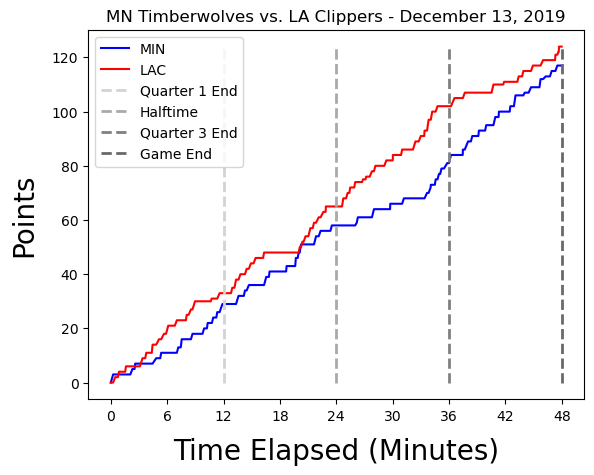

In [66]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Calculate the total time in seconds (4 quarters of 12 min each)
total_time = 12 * 4

max_home = game1['HomeScore'].values.max()
max_away = game1['AwayScore'].values.max()

max_score = max(max_home,max_away)

# Extract data for MIN and LAC
min_data = game1[game1['HomeTeam'] == 'MIN']
lac_data = game1[game1['AwayTeam'] == 'LAC']

# Calculate elapsed time within the game and subtract the minimum time to start at 0
# min_elapsed = total_time - ((min_data['Quarter'] - 1) * 720 - min_data['SecLeft'])
min_elapsed = ((min_data['Quarter'] - 0) * 12 - min_data['SecLeft'] / 60)
lac_elapsed = ((lac_data['Quarter'] - 0) * 12 - lac_data['SecLeft'] / 60)

# Sort the data in descending order based on elapsed time
min_data = min_data.sort_values(by=['Date', 'Quarter', 'SecLeft'], ascending=[True, True, False])
lac_data = lac_data.sort_values(by=['Date', 'Quarter', 'SecLeft'], ascending=[True, True, False])

# Plot the scores for MIN in blue
ax.plot(min_elapsed, min_data['HomeScore']['max'], label='MIN', color='blue')

# Plot the scores for LAC in red
ax.plot(lac_elapsed, lac_data['AwayScore']['max'], label='LAC', color='red')

plt.vlines(x=12, ymin= 0, ymax = max_score, colors='lightgrey', ls='--', lw=2, label='Quarter 1 End')
plt.vlines(x=12*2, ymin=0, ymax = max_score, colors = 'darkgrey', ls= '--', lw=2, label = 'Halftime')
plt.vlines(x=12*3, ymin=0, ymax = max_score, colors = 'grey', ls= '--', lw=2, label = 'Quarter 3 End')
plt.vlines(x=12*4, ymin=0, ymax = max_score, colors = 'dimgrey', ls= '--', lw=2, label = 'Game End')


plt.xticks(np.arange(0, 49, 6))


# Set labels and title
ax.set_xlabel('Time Elapsed (Minutes)', fontsize = 20, labelpad = 10)
ax.set_ylabel('Points', fontsize = 20, labelpad = 10)
ax.set_title('MN Timberwolves vs. LA Clippers - December 13, 2019')



# Add legend
ax.legend()

# Show the plot
plt.show()

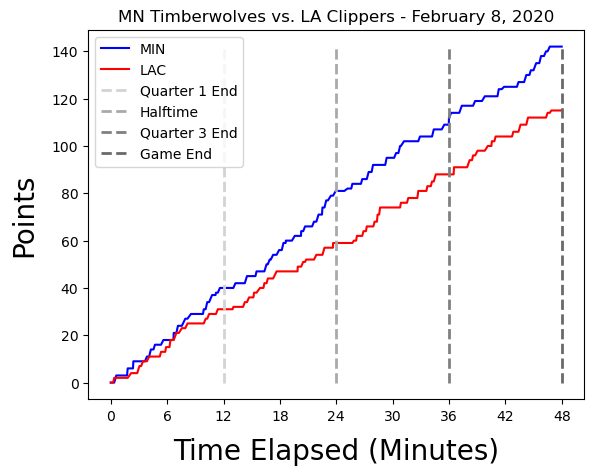

In [67]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Calculate the total time in seconds (4 quarters of 12 min each)
total_time = 12 * 4

max_home = game2['HomeScore'].values.max()
max_away = game2['AwayScore'].values.max()

max_score = max(max_home,max_away)

# Extract data for MIN and LAC
min_data = game2[game2['HomeTeam'] == 'MIN']
lac_data = game2[game2['AwayTeam'] == 'LAC']

# Calculate elapsed time within the game and subtract the minimum time to start at 0
min_elapsed = ((min_data['Quarter'] - 0) * 12 - min_data['SecLeft'] / 60)
lac_elapsed = ((lac_data['Quarter'] - 0) * 12 - lac_data['SecLeft'] / 60)

# Sort the data in descending order based on elapsed time
min_data = min_data.sort_values(by=['Date', 'Quarter', 'SecLeft'], ascending=[True, True, False])
lac_data = lac_data.sort_values(by=['Date', 'Quarter', 'SecLeft'], ascending=[True, True, False])

# Plot the scores for MIN in blue
ax.plot(min_elapsed, min_data['HomeScore']['max'], label='MIN', color='blue')

# Plot the scores for LAC in red
ax.plot(lac_elapsed, lac_data['AwayScore']['max'], label='LAC', color='red')

plt.vlines(x=12, ymin= 0, ymax = max_score, colors='lightgrey', ls='--', lw=2, label='Quarter 1 End')
plt.vlines(x=12*2, ymin=0, ymax = max_score, colors = 'darkgrey', ls= '--', lw=2, label = 'Halftime')
plt.vlines(x=12*3, ymin=0, ymax = max_score, colors = 'grey', ls= '--', lw=2, label = 'Quarter 3 End')
plt.vlines(x=12*4, ymin=0, ymax = max_score, colors = 'dimgrey', ls= '--', lw=2, label = 'Game End')

plt.xticks(np.arange(0, 49, 6))

# Set labels and title
ax.set_xlabel('Time Elapsed (Minutes)', fontsize = 20, labelpad = 10)
ax.set_ylabel('Points', fontsize = 20, labelpad = 10)
ax.set_title('MN Timberwolves vs. LA Clippers - February 8, 2020')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
# Get only twolves home games
twolves_data  = pbp[pbp['HomeTeam'] == 'MIN']

# Calculate elapsed time in minutes
twolves_data  = twolves_data .copy()

#if quarter is bettwe 1 and 4 then 12 minutes Else 5 minute quarters for overtime
twolves_data['ElapsedMinutes'] = np.where((twolves_data['Quarter'] > 0) & (twolves_data['Quarter'] <= 4),
                                          twolves_data['Quarter'] * 12 - twolves_data['SecLeft'] / 60,
                                          (twolves_data['Quarter'] - 4) * 5 + 48 - twolves_data['SecLeft'] / 60)
plt.figure(figsize=(10, 6)) 

# Create a scatter plot
sns.scatterplot(data=twolves_data , x='ElapsedMinutes', y='HomeScore', color='skyblue', label='Points Scored', s = 20)

# Create regression line using seaborn regplot
sns.regplot(data=twolves_data , x='ElapsedMinutes', y='HomeScore', scatter=False, color='royalblue', label='AVG Points Scored')

plt.vlines(x=12, ymin= 0, ymax = max_score, colors='k', ls='--', lw=2, label='Quarter 1 End')
plt.vlines(x=12*2, ymin=0, ymax = max_score, colors = 'k', ls= '--', lw=2, label = 'Halftime')
plt.vlines(x=12*3, ymin=0, ymax = max_score, colors = 'k', ls= '--', lw=2, label = 'Quarter 3 End')
plt.vlines(x=12*4, ymin=0, ymax = max_score, colors = 'k', ls= '--', lw=2, label = 'Game End')

plt.xticks(np.arange(0, 61, 6))

# Set labels and title
plt.title('MN Timberwolves 2019-2020 NBA Regular Season: Points Scored at Home Games', fontsize = 15)
plt.xlabel('Time Elapsed (Minutes)', fontsize = 20, labelpad = 10)
plt.ylabel('Points', fontsize = 20, labelpad = 10)

# Add legend
plt.legend()

# Show the plot
plt.show()